# 5. Statistics
 - Statistics refers to the mathematics and techniques with which we understand data.
 - It is a rich, enormous field, more suited to a shelf(or room) in a library rather than a chapter in a book

### Describing a Single Set of Data
 - VP of Fundraising asks you for some sort of description of how many friends your members have.

In [1]:
from collections import Counter
from linear_algebra import sum_of_squares, dot
import math
from operator import add

In [6]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,
               11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,
               10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [8]:
def make_friend_counts_histogram(plt):
    friend_counts = Counter(num_friends)
    print(friend_counts)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    print(ys)
    plt.bar(xs, ys)
    plt.axis([0,101,0,25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()

Counter({1: 23, 10: 22, 11: 17, 15: 4, 13: 4, 21: 2, 19: 2, 18: 2, 14: 2, 12: 2, 100: 1, 49: 1, 41: 1, 40: 1, 25: 1, 16: 1})
[0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 22, 17, 2, 4, 2, 4, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


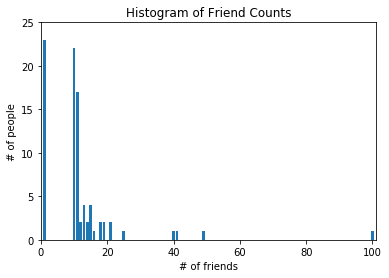

In [9]:
import matplotlib.pyplot as plt

make_friend_counts_histogram(plt)

- Unfortunately, this chart is still too difficult to slip into conversations.
- So you start generating some statistics.
- Probably the simplest statistic is simply the number of data points:

#### min, max, smallest, largest

In [10]:
num_points = len(num_friends)

largest_value = max(num_friends)
smallest_value = min(num_friends)

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

print("num_points", len(num_friends))
print("largest value", max(num_friends))
print("smallest value", min(num_friends))
print("second_smallest_value", sorted_values[1])
print("second_largest_value", sorted_values[-2])

num_points 86
largest value 100
smallest value 1
second_smallest_value 1
second_largest_value 49


In [11]:
# numpy version
import numpy as np

num_friends = np.array(num_friends)

num_points = num_friends.shape[0]

largest_value = np.max(num_friends)
smallest_value = np.min(num_friends)

sorted_values = np.sort(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

print("num_points", len(num_friends))
print("largest value", max(num_friends))
print("smallest value", min(num_friends))
print("second_smallest_value", sorted_values[1])
print("second_largest_value", sorted_values[-2])

num_friends = list(num_friends)

num_points 86
largest value 100
smallest value 1
second_smallest_value 1
second_largest_value 49


### Central Tendencies

#### mean, median, quantile, mode

In [12]:
def mean(x): # 평균
    return sum(x) / len(x)

def median(v): # 중간값
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
def quantile(x, p): # 분위수
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def mode(x): # 가장 자주 나타나는 값
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [13]:
print("mean(num_friens)", mean(num_friends))
print("median(num_friends)", median(num_friends))
print("quantile(num_friends, 0.10)", quantile(num_friends, 0.10))
print("quantile(num_friends, 0.25)", quantile(num_friends, 0.25))
print("quantile(num_friends, 0.75)", quantile(num_friends, 0.75))
print("quantile(num_friends, 0.90)", quantile(num_friends, 0.90))
print("mode(num_friends)", mode(num_friends))

mean(num_friens) 11.406976744186046
median(num_friends) 10.0
quantile(num_friends, 0.10) 1
quantile(num_friends, 0.25) 1
quantile(num_friends, 0.75) 13
quantile(num_friends, 0.90) 19
mode(num_friends) [1]


In [50]:
# numpy version
import numpy as np

# np.quantile is available from v1.16
# np.percentile uses percent instead of ratio
print("mean(num_friends)", np.mean(num_friends))
print("median(num_friends)", np.median(num_friends))
print("quantile(num_friends, 0.10)", np.percentile(num_friends, 10))
print("quantile(num_friends, 0.25)", np.percentile(num_friends, 25))
print("quantile(num_friends, 0.75)", np.percentile(num_friends, 75))
print("quantile(num_friends, 0.90)", np.percentile(num_friends, 90))
# 아직 해결 못함
#print("mode(num_friends)", )
a, b = np.histogram(num_friends, np.array(num_friends).size)
index = np.where(np.max(a[0]))[0]




mean(num_friends) 11.406976744186046
median(num_friends) 10.0
quantile(num_friends, 0.10) 1.0
quantile(num_friends, 0.25) 1.0
quantile(num_friends, 0.75) 12.75
quantile(num_friends, 0.90) 18.5
[0]


### Disperson
 - Dispersion refers to measures of how spread out our data is.
 - Range is just the difference between the largest and smallest elements
 - variance
 - Standard deviation
 - Both the range and the standard deviaion habe the same outlier problem
 - Interquartile_tange: the difference between the 75th percentile value and the 25th percentile value

In [39]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

def de_mean(x): # 편차
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x): # 분산 # 왜 n-1인지는 모르겠음
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):  # 표준편차
    return math.sqrt(variance(x))

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [40]:
print("data_range(num_friends)", data_range(num_friends))
print("variance(num_friends)", variance(num_friends))
print("standard_deviation(num_friends)", standard_deviation(num_friends))
print("interquartile_range(num_friends)", interquartile_range(num_friends))

data_range(num_friends) 99
variance(num_friends) 166.5971272229824
standard_deviation(num_friends) 12.907250955295725
interquartile_range(num_friends) 12


In [42]:
# numpy version
num_friends = np.array(num_friends)
print("data_range(num_friends)", np.ptp(num_friends)) # peak to peak
print("data_range(num_friends)", np.max(num_friends) - np.min(num_friends))
print("variance(num_friends)", np.var(num_friends, ddof=1))
print("standard_deviation(num_friends)", np.std(num_friends, ddof=1))
q75, q25 = np.percentile(num_friends, [75, 25])
print("interquartile_range(num_friends)", q75 - q25)
num_friends = list(num_friends)

data_range(num_friends) 99
data_range(num_friends) 99
variance(num_friends) 166.59712722298212
standard_deviation(num_friends) 12.907250955295714
interquartile_range(num_friends) 11.75


### Boxplot
 - it is very explanatory
 - It shows the summary of data

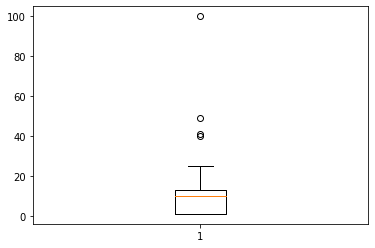

In [51]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.boxplot(num_friends)
plt.show()

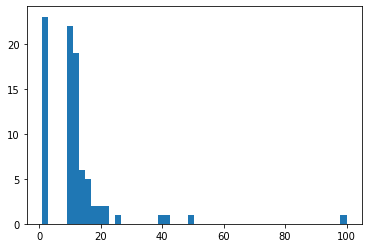

In [52]:
plt.hist(num_friends, bins=50)
plt.show()

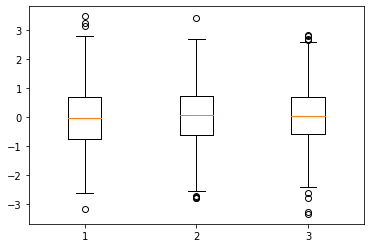

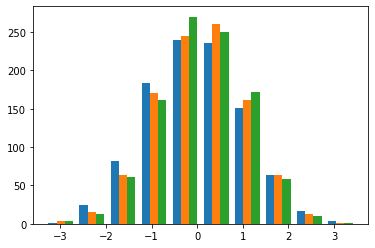

In [53]:
data = np.random.randn(1000,3)
plt.boxplot(data)
plt.show()
plt.hist(data, bins=10)
plt.show()

If we know the population mean, the standard deviation is given by

... 모집단의 평균을 알 때 표준편차 구하기(feat. n)

If we don't know the population mean, we can use sample mean to calculate the standard deviation.

... 모집단의 평균을 모를 때 표준편차 구하기(feat. n-1)

In [54]:
import numpy as np
print(np.std([1,2,3]))
print(np.std([1,2,3], ddof=1))  # degree of freedom
print(standard_deviation([1,2,3]))

0.816496580927726
1.0
1.0


### Correlation
 - DataSciencester's VP of Growth has a theory that the amount of time people spend on the site is related to the number of friends they have son the site, and she's asked you to verify this.
 - We'd like to investigate the relationship between these two metrics.
 
 - Whereas variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem from their means.
 - It's hard to interpret what a "large" convariance is unless it is normalized.
 - ...
 - ...

In [57]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [58]:
print(covariance(num_friends, daily_minutes))
print(correlation(num_friends, daily_minutes))

#we may conclude that two variables are less correlated

-27.267167420814456
-0.1289981763790932


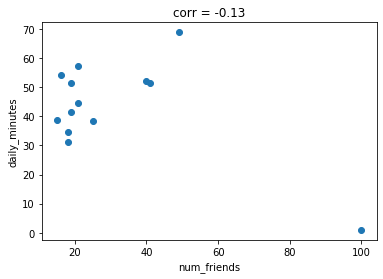

In [63]:
plt.scatter(num_friends[:len(daily_minutes)], daily_minutes)
plt.xlabel('num_friends')
plt.ylabel('daily_minutes')
plt.title('corr = {:.2}'.format(correlation(num_friends, daily_minutes)))
plt.show()

Remove outliers whose index is 0
 - It turns out that the outlier is a test data in a database, which is a garbage
 - Recall "GIGO: Garbage in, garbage out"

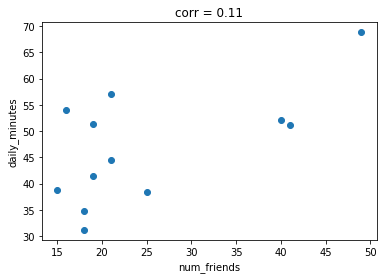

In [67]:
plt.scatter(num_friends[1: len(daily_minutes)], daily_minutes[1:])
#plt.scatter(num_friends[4:], daily_minutes[4:])
plt.xlabel('num_friends')
plt.ylabel('daily_minutes')
plt.title('corr = {:.2}'.format(correlation(num_friends[1:], daily_minutes[1:])))
plt.show()

Correlation in Plain English


Correlation vs Cosine similarity

In [ ]:
# numpy version

### Simpson's paradox

### Some Other Correlational Caveats
 - A correlation of zero indicates that there is no linear relationship between the two variables.

#### Related but not captured

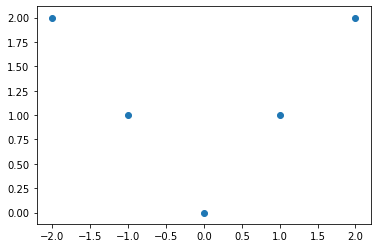

In [68]:
# absolute value relationship
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]
plt.scatter(x, y)
plt.show()

#### How important or how interesting the correlation is?

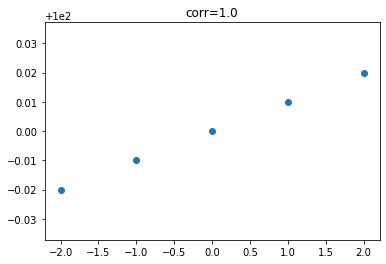

In [69]:
x = [-2, -1, 0, 1, 2]
y = [99.98,99.99,100,100.01,100.02]
plt.scatter(x, y)
plt.title('corr={:.2}'.format(correlation(x,y)))
plt.show()

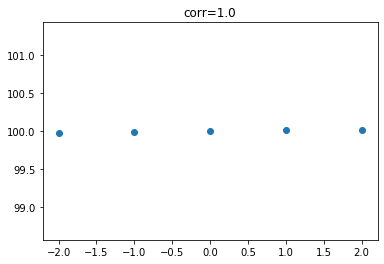

In [70]:
# Perfectly correlated. This relationship isn;t all that interesting.
x = [-2, -1, 0, 1, 2]
y = [99.98,99.99,100,100.01,100.02]
plt.scatter(x,y)
plt.axis('equal')
plt.title('corr={:.2}'.format(correlation(x,y)))
plt.show()

### Correlation and Causation
-"Correlation is not causation"

### Causation